In [29]:
import numpy as reshape
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #helps with sampling
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor #model family

In [30]:
#cross validation
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error, r2_score #evaluation metrics

from sklearn.externals import joblib #saving scikit models

In [31]:
df_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(df_url, sep = ';')

In [32]:
df.head()
#df.shape
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [33]:
#split data
target_features = df.quality
input_features = df.drop('quality', axis=1)

In [34]:
input_train, input_test, target_train, target_test = train_test_split(input_features, target_features, test_size=0.2, random_state=123, stratify=target_features)

In [35]:
#preprocessing
scaler = preprocessing.StandardScaler().fit(input_train)

input_train_scaled = scaler.transform(input_train)
 
print(input_train_scaled.mean(axis = 0))

 
print(input_train_scaled.std(axis=0))


[ 1.16664562e-16 -3.05550043e-17 -8.47206937e-17 -2.22218213e-17
  2.22218213e-17 -6.38877362e-17 -4.16659149e-18 -2.54439854e-15
 -8.70817622e-16 -4.08325966e-16 -1.17220107e-15]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [36]:

input_test_scaled = scaler.transform(input_test)
 
print(input_test_scaled.mean(axis=0))

 
print(input_test_scaled.std(axis=0))


[ 0.02776704  0.02592492 -0.03078587 -0.03137977 -0.00471876 -0.04413827
 -0.02414174 -0.00293273 -0.00467444 -0.10894663  0.01043391]
[1.02160495 1.00135689 0.97456598 0.91099054 0.86716698 0.94193125
 1.03673213 1.03145119 0.95734849 0.83829505 1.0286218 ]


In [37]:
pipeline = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=100))

In [38]:
#learning about hyperparameters
print(pipeline.get_params())

{'memory': None, 'steps': [('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False))], 'verbose': False, 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'randomforestregressor': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
           

In [39]:
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'], 'randomforestregressor__max_depth': [None, 5, 3, 1]}

In [40]:

clf = GridSearchCV(pipeline, hyperparameters, cv=10)
 
# Fit and tune model
clf.fit(input_train, target_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('randomforestregressor',
                                        RandomForestRegressor(bootstrap=True,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              min_impurity_decrease=0.0,
                                                              min_impurity_split

In [41]:

print(clf.best_params_)


{'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'sqrt'}


In [42]:
print(clf.refit)
# True - should be on automatically

True


In [43]:
target_pred = clf.predict(input_test)

In [44]:
x = r2_score(target_test, target_pred)
print(r2_score(target_test, target_pred))

y = mean_squared_error(target_test, target_pred)
print(mean_squared_error(target_test, target_pred))


0.45659228766874516
0.35064656250000004


Text(0.5, 0, 'quality count')

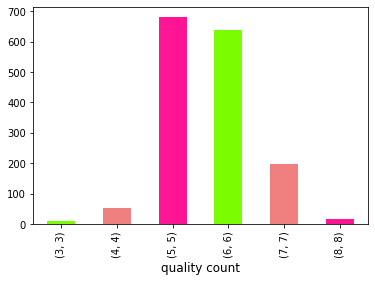

In [48]:
df_rank = df.groupby('quality')
df_freq=df_rank['quality'].value_counts()

ax = df_freq.plot(kind='bar', color = ['lawngreen', 'lightcoral', 'deeppink'])
ax.set_xlabel("quality count", fontsize=12)


quality
3     10
4     48
5    239
Name: density, dtype: int64


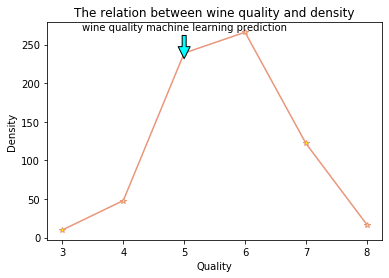

In [46]:
sorting= df.groupby('quality').density.nunique()
print(sorting.head(3))

plt.plot(sorting, color = 'darksalmon', marker = '*',markerfacecolor = 'yellow' )

plt.title('The relation between wine quality and density')
plt.annotate('wine quality machine learning prediction', (5,230), textcoords="offset points", xytext=(0,30), ha='center', arrowprops=dict(facecolor='aqua', shrink=0.05))
plt.ylabel('Density')
plt.xlabel('Quality')
plt.show()